In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1)

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [4]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Checking null value

In [5]:
for column in sorted(train.columns):
    null_cnt = train[column].isnull().sum()
    if null_cnt == False:
        continue
    ratio = train[column].isnull().sum() / train[column].shape[0]
    print('Percentage of null data in column {} : {:.2f}%'.format(column , ratio * 100))

Percentage of null data in column Age : 19.87%
Percentage of null data in column Cabin : 77.10%
Percentage of null data in column Embarked : 0.22%


In [6]:
for column in sorted(test.columns):
    null_cnt = test[column].isnull().sum()
    if null_cnt == False:
        continue
    ratio = null_cnt / test[column].shape[0]
    print('Percentage of null data in column {} : {:.2f}%'.format(column, ratio * 100))

Percentage of null data in column Age : 20.57%
Percentage of null data in column Cabin : 78.23%
Percentage of null data in column Fare : 0.24%


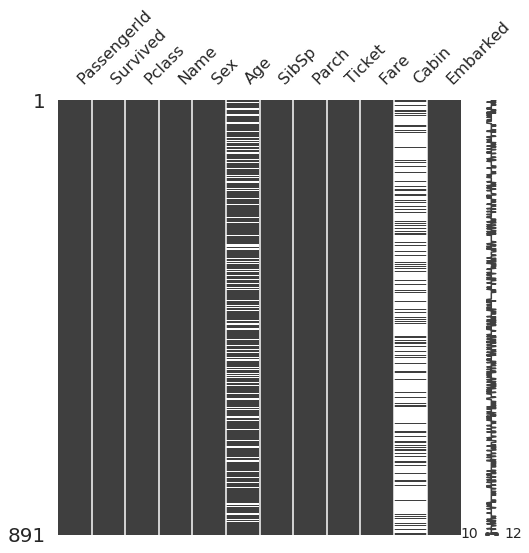

In [7]:
msno.matrix(df=train, figsize=(8,8))

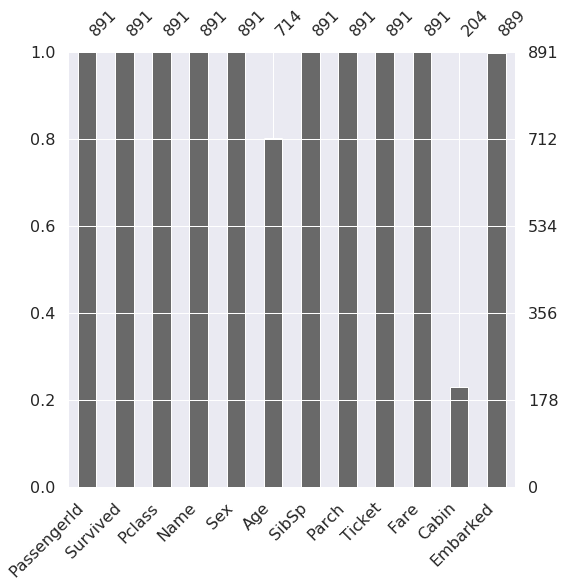

In [8]:
msno.bar(df=train, figsize=(8,8))

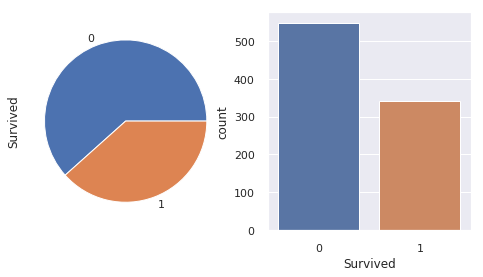

In [9]:
f, ax = plt.subplots(1,2, figsize=(8, 4))
train['Survived'].value_counts().plot.pie(ax=ax[0])
sns.countplot('Survived', data=train, ax=ax[1])
plt.show()

In [10]:
survived = train['Survived'].value_counts()
for idx, value in survived.iteritems():
    if idx == 0:
        print('People who are dead : {:.1f}%'.format((value/survived.sum()) * 100))
    else:
        print('People who survived : {:.1f}%'.format((value/survived.sum()) * 100))

People who are dead : 61.6%
People who survived : 38.4%


## Exploratory Data Analysis

### Pclass

In [11]:
pclass = 100 * (train[['Pclass', 'Survived']].groupby('Pclass').sum() / train[['Pclass', 'Survived']].groupby('Pclass').count())aa

In [12]:
pclass.applymap(lambda x: '{:.2f}%'.format(x))

Survived
Pclass         
1        62.96%
2        47.28%
3        24.24%

In [13]:
crosstab = pd.crosstab(train['Pclass'], train['Survived'])
crosstab['survived_rate'] = crosstab[1] / (crosstab[1] + crosstab[0])
crosstab['survived_rate'] = crosstab['survived_rate'].apply(lambda x: '{:.1f}%'.format(100*x))
crosstab

Survived    0    1 survived_rate
Pclass                          
1          80  136         63.0%
2          97   87         47.3%
3         372  119         24.2%

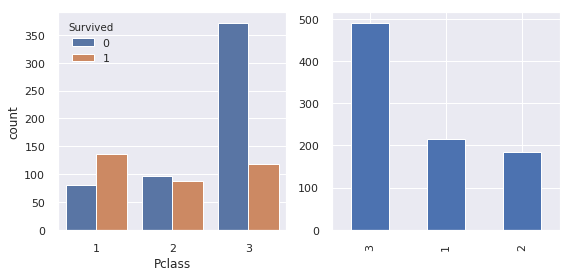

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
train['Pclass'].value_counts().plot.bar(ax=ax[1])
sns.countplot('Pclass', data=train, hue='Survived', ax=ax[0])

### Sex

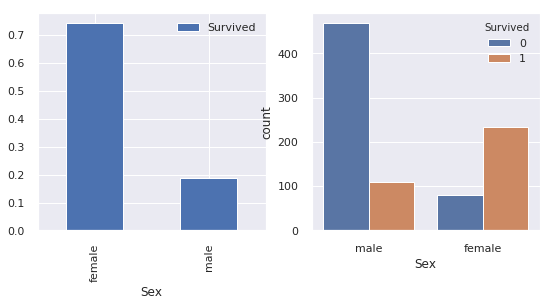

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
train[['Sex', 'Survived']].groupby('Sex', as_index=True).mean().plot.bar(ax=ax[0])
sns.countplot('Sex', data=train, hue='Survived', ax=ax[1])

In [28]:
train[['Sex', 'Survived']].groupby('Sex', as_index=True).mean()

Survived
Sex             
female  0.742038
male    0.188908

In [30]:
pd.crosstab(train['Sex'], train['Survived']).style.background_gradient(cmap='summer_r')

### Pclass & Sex

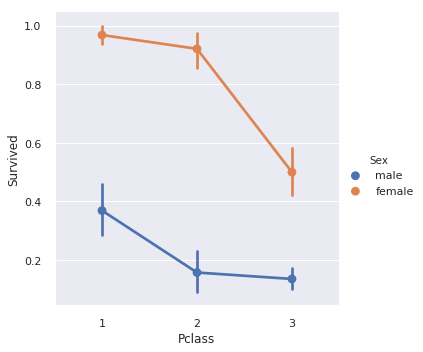

In [31]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)

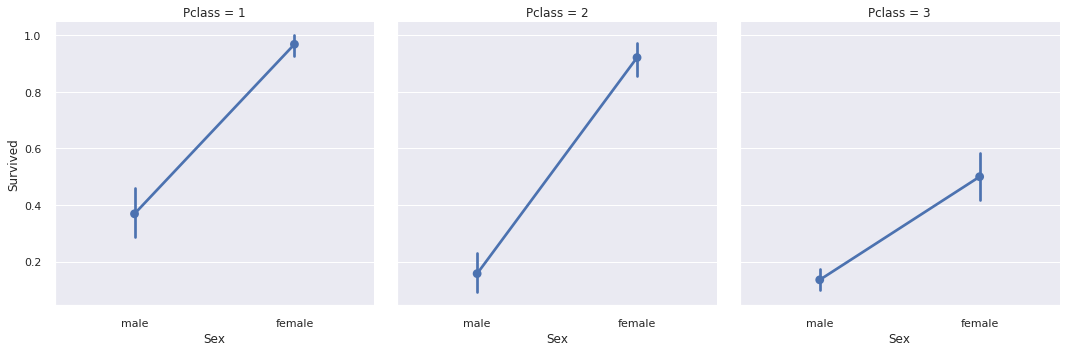

In [38]:
sns.factorplot('Sex', 'Survived', col='Pclass', data=train, font_scale=3)

### Age

In [47]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

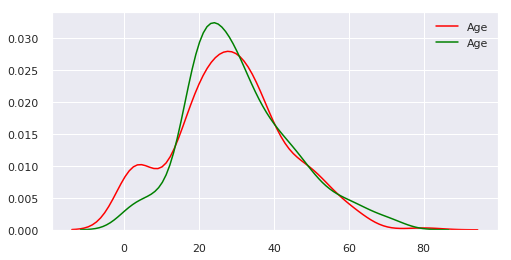

In [64]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
train_ages = train[train['Age'].isnull() == False] #null 일단 제거
sns.kdeplot(train_ages[train_ages['Survived'] == 1]['Age'], ax = ax, color='red')
sns.kdeplot(train_ages[train_ages['Survived'] == 0]['Age'], ax = ax, color='green')

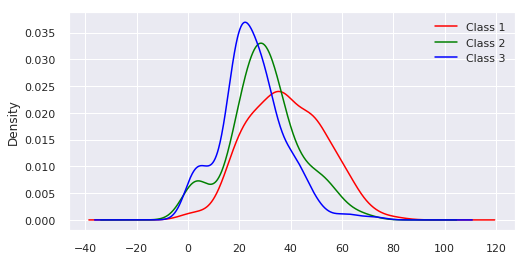

In [72]:
plt.figure(figsize=(8,4))
train['Age'][train['Pclass'] == 1].plot(kind='kde', color='red')
train['Age'][train['Pclass'] == 2].plot(kind='kde', color='green')
train['Age'][train['Pclass'] == 3].plot(kind='kde', color='blue')
plt.legend(['Class 1', 'Class 2', 'Class 3'])

In [75]:
print(train['Age'].max())
print(train['Age'].min())

80.0
0.42


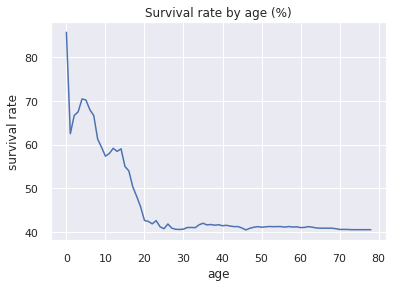

In [89]:
as_dist = [] #age, survival distribution
for i in range(1, 80):
    survived = train[train['Age'] <= i]['Survived'].sum() /  train[train['Age'] <= i].shape[0]
    as_dist.append(100 * survived)

plt.plot(as_dist)
plt.title('Survival rate by age (%)')
plt.xlabel('age')
plt.ylabel('survival rate')
plt.show()

### Age & Sex & Pclass

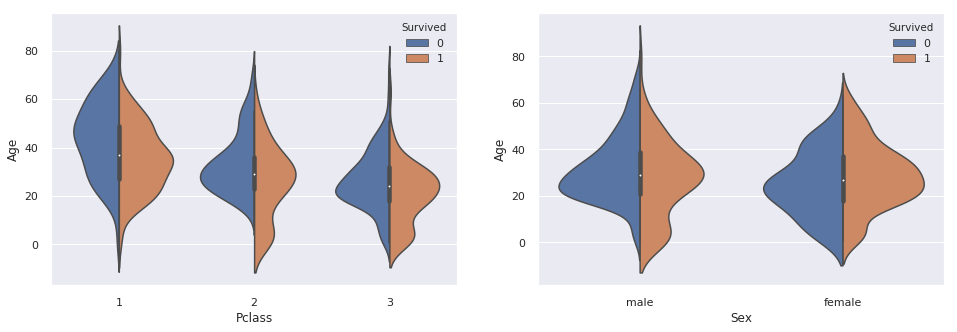

In [94]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.violinplot('Pclass', 'Age', data=train, hue='Survived', ax=ax[0], split=True)
sns.violinplot('Sex', 'Age', data=train, hue='Survived', ax=ax[1], split=True)

### Embarked

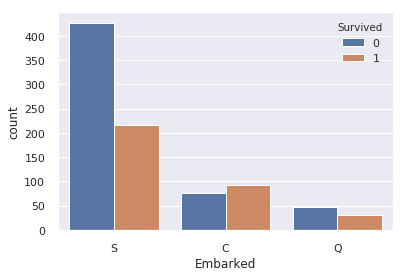

In [109]:
sns.countplot('Embarked', data=train, hue='Survived')

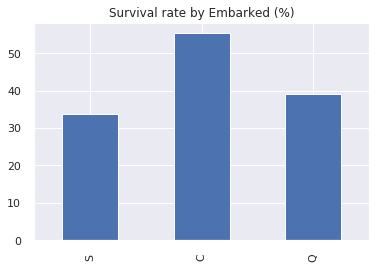

In [121]:
rate = train[train['Survived'] == 1]['Embarked'].value_counts() / train['Embarked'].value_counts()
rate = rate.apply(lambda x: (x * 100))
rate.plot.bar()
plt.title('Survival rate by Embarked (%)')
plt.show()